# Git clone
- Here, we are cloning github repo where we have stored our dataset

In [ ]:
!git clone https://github.com/gaurangk347/handGestureRecognition.git

fatal: destination path 'handGestureRecognition' already exists and is not an empty directory.


# List the files
Below code snipper list the files we cloned from above github repo whi is in the directory "handGestureRecognition/leapGestRecog"

In [ ]:
#import os, and list all files in the dir mentioned
import os
files = os.listdir("handGestureRecognition/leapGestRecog")
print(files)

['00', '04', '03', '06', '07', '08', '02', '01', '05', '09']


# Import necessary libraries and define path to dataset
- Import necessary libraries.
- Define the path to the dataset.
- List all folders in the dataset directory.
- List all different classes in the '00' subdirectory.
- Print the unique class names.

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display

#define path to the dataset and list all folders
path='handGestureRecognition/leapGestRecog'
folders=os.listdir(path)
folders=set(folders) # Convert list to set to get unique folder names

import codecs
import json

# List all different classes within the '00' subdirectory
different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)

print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'08_palm_moved', '06_index', '09_c', '05_thumb', '01_palm', '07_ok', '03_fist', '02_l', '04_fist_moved', '10_down'}


# Create class and class_name to store class id and name
The provided code snippet initializes two dictionaries to store information about the classes in your dataset:

- classes: This dictionary stores class IDs as keys and class names as values.
- names_of_classes: This dictionary stores class names as keys and class IDs as values.

The code iterates through each item in different_classes and splits the item name using an underscore (_) as the delimiter. The first part of the split (before the underscore) is treated as the class ID, and the remaining part is treated as the class name.

In [ ]:
#Initialise dictionary to store class information
classes=dict() #dict to store class IDs as keys and class names as values
names_of_classes=dict() #dict to store class names as keys and class IDs as values
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])

print(classes)
print(names_of_classes)

{8: 'palm_moved', 6: 'index', 9: 'c', 5: 'thumb', 1: 'palm', 7: 'ok', 3: 'fist', 2: 'l', 4: 'fist_moved', 10: 'down'}
{'palm_moved': 8, 'index': 6, 'c': 9, 'thumb': 5, 'palm': 1, 'ok': 7, 'fist': 3, 'l': 2, 'fist_moved': 4, 'down': 10}


# Data Preprocessing
- The provided code processes images in a dataset, converts them to black and white using a threshold, and stores the processed data along with class labels in a CSV file.
- A threshold value of 200 is defined for converting grayscale images to binary.
- Image Processing:

    For each image:
    - The image is read in grayscale mode.
    - It is resized to 160x60 pixels.
    - Binary thresholding is applied using Otsu's method.
    - The original and thresholded images are converted to numpy arrays of type float64 and added to the z and x lists, respectively.
    - The class label (extracted from the subdirectory name) is added to the y list.

In [ ]:
import pandas as pd
import cv2

x=[] #list to store binary images
z=[] #list to store original images
y=[] #list to store class labels

#converting the image to black and white
threshold=200 #threshold to convert images to black and white


#iterate over each folder
for i in folders:
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        images=os.listdir(subject+'/'+j)
        for k in images:   #iterate over each image

            results=dict()
            #get the class label form subfolder
            results['y']=j.split('_')[0]

            #read the image in grayscale
            img = cv2.imread(subject+'/'+j+'/'+k,0)

            #resize the image
            img=cv2.resize(img,(int(160),int(60)))

            #apply binary thresholding
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            #convert original image to numpy array of type float
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)

            #convert thresholded image to np array type float
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)

            #append the class label to y
            y.append(int(j.split('_')[0]))
            results['x']=imgf
#print
print(list(set(y)))

#create dataframe with processed images and labels
df=pd.DataFrame({'x':x,'y':y})
df.to_csv('results.csv',index=False)#save data to csv file

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Sampling Images

Class Label: 1


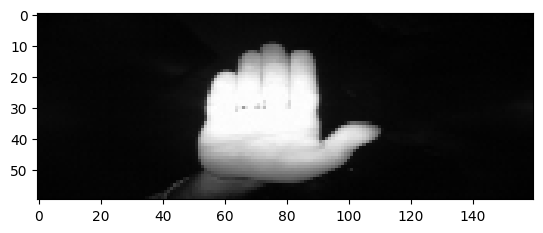

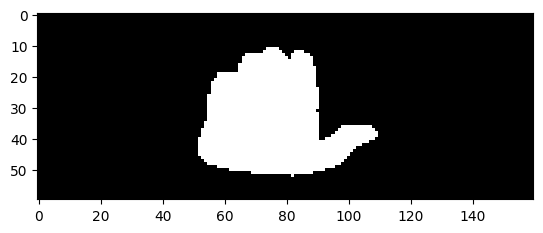

Class Label: 2


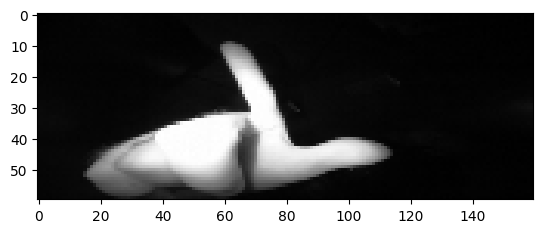

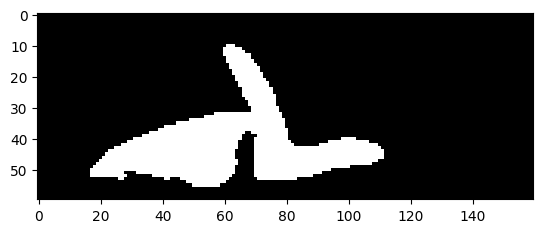

Class Label: 3


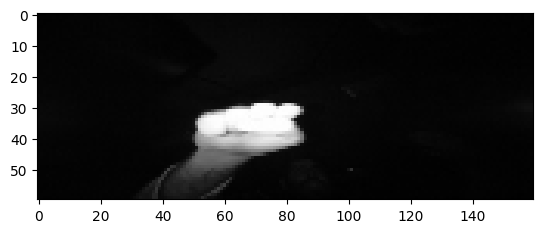

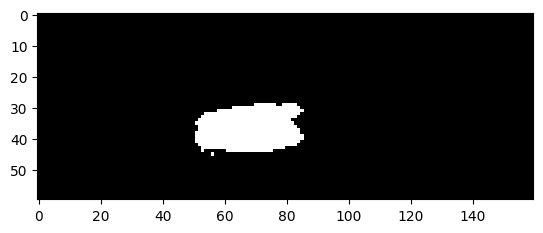

Class Label: 4


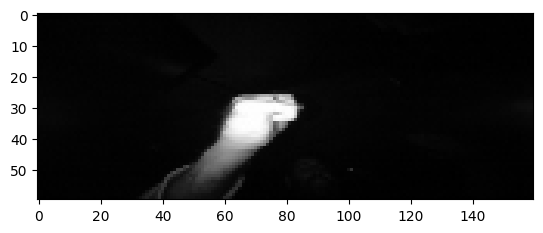

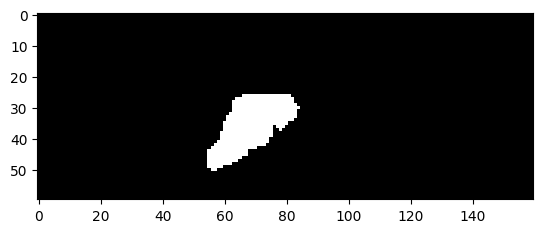

Class Label: 5


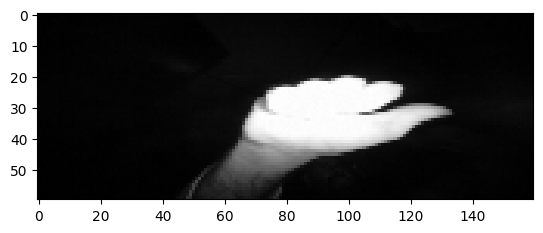

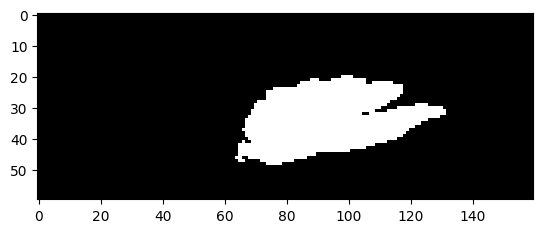

Class Label: 6


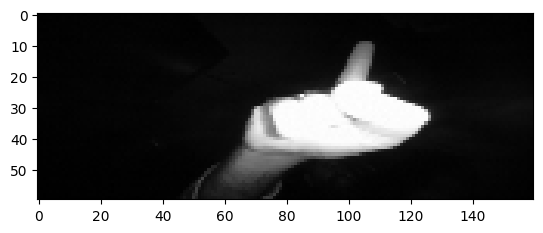

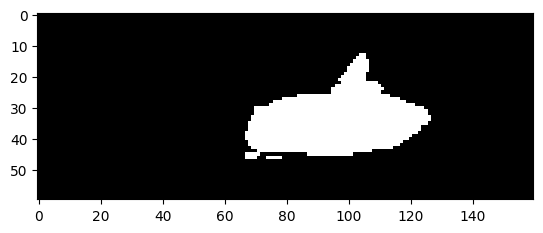

Class Label: 7


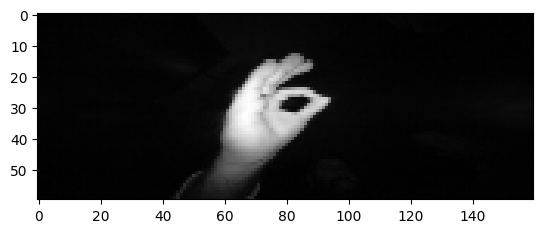

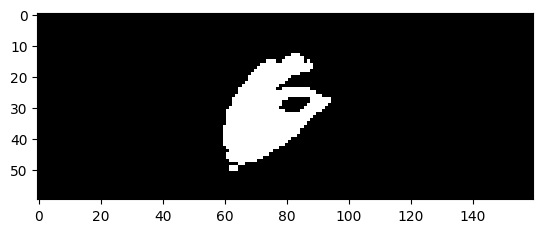

Class Label: 8


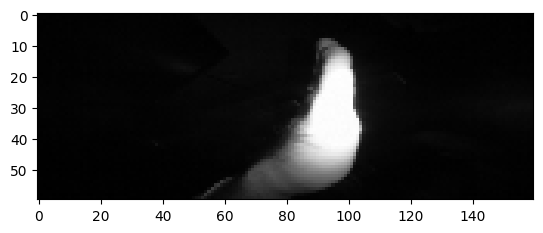

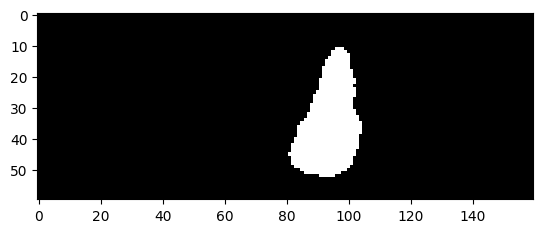

Class Label: 9


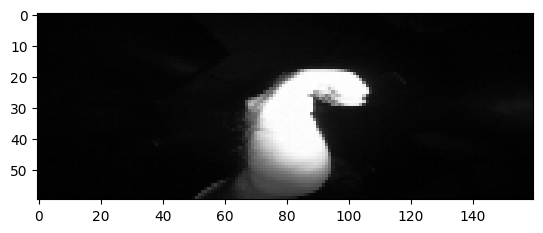

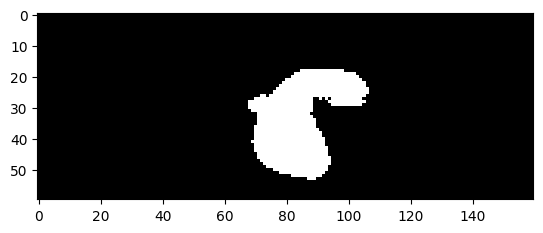

Class Label: 10


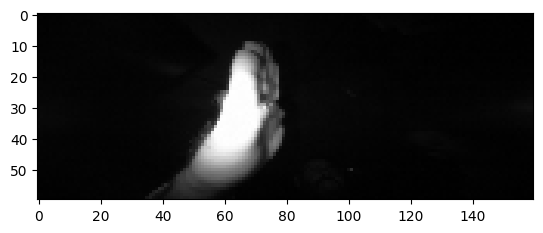

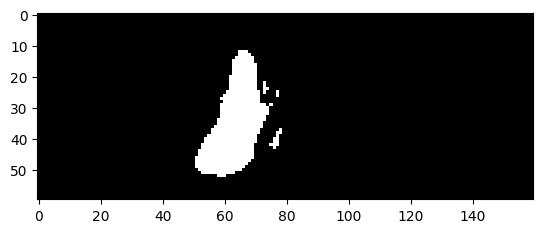

In [ ]:
# Initialize a list to track the first occurrence of each class
#sample black and white image from each class
l = []
list_names = []

for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()

    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)
    plt.show()

# Image conversion
- Below code convers the binaryImage and classLabels to numpy array
- Aslo, The classLabels array is reshaped to ensure it's a 2D array, with each label being in its own row.
- This step is often necessary for compatibility with machine learning models that expect labels in a specific format.



In [ ]:
# Convert list of images and labels to numpy arrays
x = np.array(x)  # Array of binary (black and white) images
y = np.array(y)    # Array of class labels

# Reshape classLabels to ensure it's a 2D array
y = y.reshape(len(x), 1)

# Print the shape of the binary image array and the class label array
print(x.shape)  # Shape of the binary images array
print(y.shape)   # Shape of the class labels array

# Print the maximum and minimum values in the class labels
print(max(y), min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [ ]:
#find and print unique class labels
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# One-hot encoding
- One-hot encoding is a process that converts categorical labels into a binary matrix representation
- For each label in classLabels, an array actual is created with zeros, and the position corresponding to the label index is set to 1.

In [ ]:
import keras
from keras.utils import to_categorical

#fucntion for one hot encoding
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)

y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 0 0 0 0 0 1 0 0]
<class 'numpy.ndarray'>


# Reshape the binaryImages array
- The goal is to reshape the binaryImages array to have four dimensions suitable for feeding into a convolutional neural network (CNN).
- The code snippet also normalizes the pixel values by dividing them by 255 to scale them to the range [0, 1]

In [ ]:
# Reshape x to have shape (number_of_images, height, width, channels)
x_data = x.reshape((len(x), 60, 160, 1))

#normalise the image data
x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


# Split the dataset
- The code provided uses the train_test_split function from sklearn.model_selection to split the dataset into training, validation, and test sets.
- This is a common practice in machine learning to evaluate the model's performance on unseen data and tune hyperparameters.


In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into training data (80%) and further data (20%)
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)

#Split the further data into validation data (50% of further data) and test data (50% of further data)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
from keras import layers
from keras import models

# Principal component analysis
- binaryImages to include a single channel (grayscale), normalize the data, and then flatten each image from a 2D array to a 1D array.

In [ ]:
# Reshape the data to include a single channel (grayscale)
x_data = x.reshape((len(x), 60, 160, 1))

# Normalize the data to the range [0, 1]
x_data /= 255.0

# Convert the array to a list of flattened images
x_data = list(x_data)
for i in range(len(x_data)):
    x_data[i] = x_data[i].flatten()  # Flatten each image from 2D to 1D

# Convert back to NumPy array if needed
x_data = np.array(x_data)

# Print the shape of the flattened data
print(x_data.shape)

(20000, 9600)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Initialize the PCA model to reduce the data to 4 principal components
pca = PCA(n_components=4)

# Apply PCA to the bi_data
x_data = pca.fit_transform(x_data)

# Print explained variance ratio and singular values
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("Singular Values:")
print(pca.singular_values_)

# Split the PCA-transformed data and labels into training and further sets
x_train, x_further, y_train, y_further = train_test_split(x_data, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("x_train shape:", x_train.shape)
print("x_further shape:", x_further.shape)
print("y_train shape:", y_train.shape)
print("y_further shape:", y_further.shape)

Explained Variance Ratio:
[0.25498139 0.08075452 0.06690615 0.041779  ]
Singular Values:
[5.99919819 3.37615501 3.07306668 2.42838763]
x_train shape: (16000, 4)
x_further shape: (4000, 4)
y_train shape: (16000, 1)
y_further shape: (4000, 1)


In [ ]:
# Import the StandardScaler class from scikit-learn's preprocessing module. This class is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

#Initialize a StandardScaler object which will be used to standardize (normalize) the feature values.
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_further)
print(X_train.shape)
print(X_test.shape)

(16000, 4)
(4000, 4)


# K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  #set k =5
#fit the model on training data
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [ ]:
#Use the trained KNeighborsClassifier model to make predictions on the standardized test data (X_test).
y_pred_knn = classifier.predict(X_test)
y_train_score_knn=classifier.predict(X_train)

Accuracy of KNN model is:
Test  0.96825
Train 0.97875
Precision (Test): 0.9683394531435264
Recall (Test): 0.96825
F1 Score (Test): 0.968157238614102


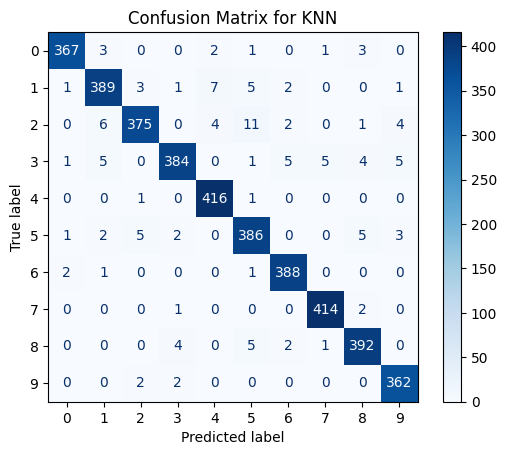

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


print("Accuracy of KNN model is:\nTest ", accuracy_score(y_further, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

# Calculate precision, recall, F1 score, sensitivity, and specificity for the test data
precision = precision_score(y_further, y_pred_knn, average='weighted')
recall = recall_score(y_further, y_pred_knn, average='weighted')
f1 = f1_score(y_further, y_pred_knn, average='weighted')

print("Precision (Test):", precision)
print("Recall (Test):", recall)
print("F1 Score (Test):", f1)

cm = confusion_matrix(y_further, y_pred_knn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.show()

# Decision tree

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

Accuracy of Decision tree model is:
Test  0.8195
Train 0.8413125
Precision (Test): 0.8350144515654647
Recall (Test): 0.8195
F1 Score (Test): 0.8237317748249927


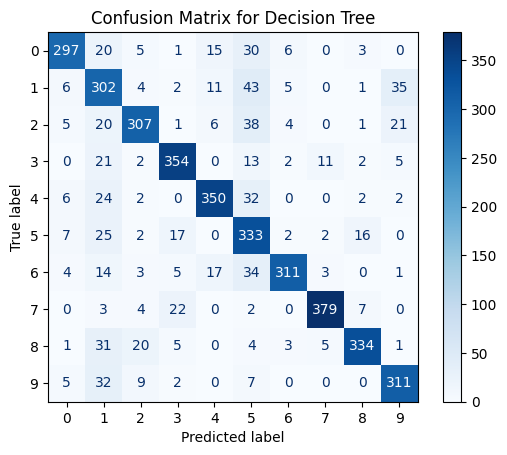

In [ ]:
print("Accuracy of Decision tree model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

# Calculate and print precision, recall, and F1 score for the test data
print("Precision (Test):", precision_score(y_further, y_pred_dt, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred_dt, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred_dt, average='weighted'))

# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train.ravel())

In [ ]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

Accuracy of Random forest model is:
Test  0.97275
Train 0.9968125
Feature importances: [0.25266255 0.26219264 0.24667631 0.2384685 ]
Precision (Test): 0.9729919984417019
Recall (Test): 0.97275
F1 Score (Test): 0.9727559067712378


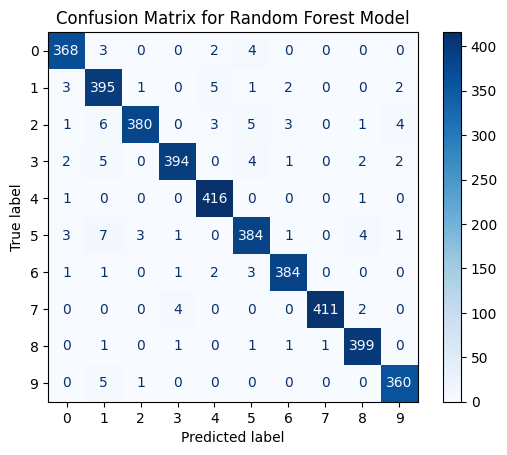

In [ ]:
print("Accuracy of Random forest model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

importances = clf_rft.feature_importances_
print("Feature importances:", importances)

# Calculate and print precision, recall, and F1 score for the test data
print("Precision (Test):", precision_score(y_further, y_pred_rft, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred_rft, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred_rft, average='weighted'))

# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred_rft)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


#ANN



Accuracy of Multilayer perceptron model is:
Test  0.95375
Train 0.96475
Precision (Test): 0.9546223361332656
Recall (Test): 0.95375
F1 Score (Test): 0.9537061509369612


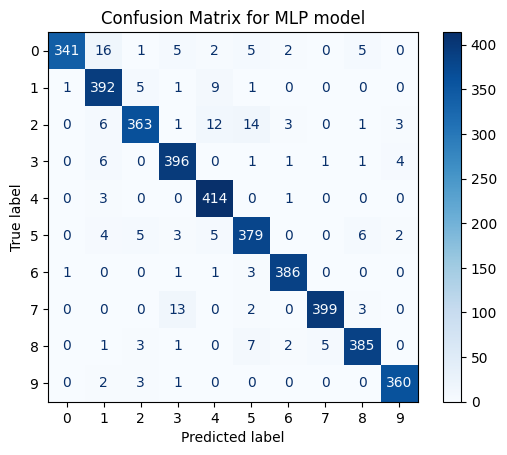

In [ ]:
from sklearn.neural_network import MLPClassifier

#here we set the max iter to 1200, and learning rate to 0.001 to converge successfully,
ann_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1200, learning_rate_init= 0.001)
ann_clf.fit(X_train, y_train.ravel())
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)


print("Accuracy of Multilayer perceptron model is:\nTest ", accuracy_score(y_further, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))

# Calculate and print precision, recall, and F1 score for the test data
print("Precision (Test):", precision_score(y_further, y_pred_ann, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred_ann, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred_ann, average='weighted'))

# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred_ann)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP model")
plt.show()



#Support Vector Machine with RBF kernel
Kernel: The Radial Basis Function (RBF) kernel maps data into a higher-dimensional space to find a non-linear decision boundary.

Accuracy of SVM model is:
Test  0.893
Train 0.9019375
Precision (Test): 0.8960794847926666
Recall (Test): 0.893
F1 Score (Test): 0.8923298076974088


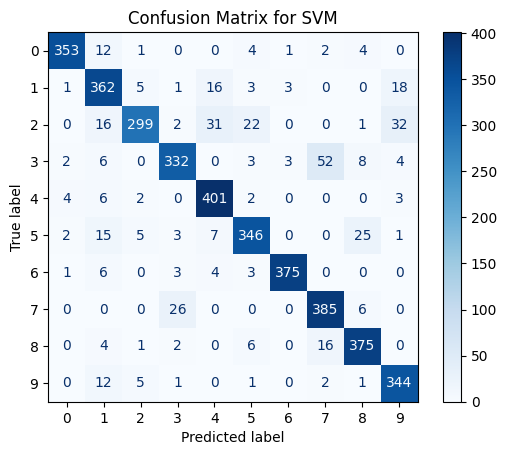

In [ ]:
from sklearn.svm import SVC

# `kernel='rbf'`: Uses the Radial Basis Function kernel, which is effective for non-linear decision boundaries.
#`C=10`: Regularization parameter. A higher value can lead to a more complex model.
#`probability=True`: Enables probability estimates, which can be useful for some applications, though it may slow down training.
svm_model_rbf = SVC(kernel = 'rbf', C = 10,probability=True).fit(X_train, y_train.ravel())

y_pred_svm=svm_model_rbf.predict(X_test)
y_train_score_svm=svm_model_rbf.predict(X_train)

print("Accuracy of SVM model is:\nTest ", accuracy_score(y_further, y_pred_svm, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_svm, normalize=True, sample_weight=None))

print("Precision (Test):", precision_score(y_further, y_pred_svm, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred_svm, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred_svm, average='weighted'))

# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()


# Voting Based Ensemble Classifier

Accuracy of Voting Based Ensemble Classifier is:
Test  0.9715
Train 0.9851875
Precision (Test): 0.9718136201540062
Recall (Test): 0.9715
F1 Score (Test): 0.9714440846505248


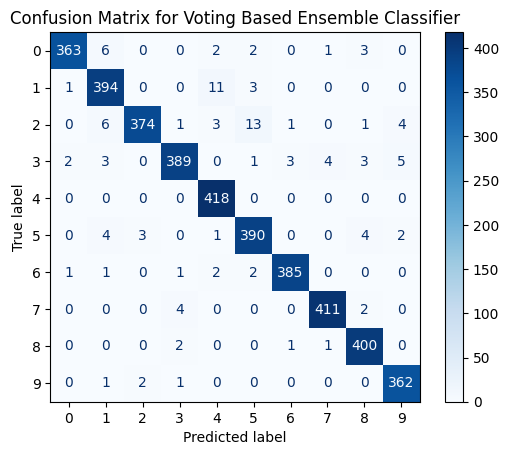

In [ ]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('ann',ann_clf),('clf_rft',clf_rft),('dt',clf),('sv',svm_model_rbf),('knn',classifier)],voting='soft')
model.fit(X_train, y_train.ravel())

y_pred=model.predict(X_test)
y_train_score=model.predict(X_train)

print("Accuracy of Voting Based Ensemble Classifier is:\nTest ", accuracy_score(y_further, y_pred, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score, normalize=True, sample_weight=None))

print("Precision (Test):", precision_score(y_further, y_pred, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred, average='weighted'))

# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Voting Based Ensemble Classifier")
plt.show()


# Stacking based ensemble classifier
Feature Vectors: stacking_xtest and stacking_xtrain are created by using the predictions from the base models (SVM, VotingClassifier, ANN, Random Forest, Decision Tree) as features for each sample. Meta-Model: ann_stacking (an MLPClassifier) is used as the meta-model to learn how to combine these predictions to improve overall performance.

Accuracy of stacking based ensemble classifier is:
Test  0.9725
Train 0.99825
Precision (Test): 0.9725760828026876
Recall (Test): 0.9725
F1 Score (Test): 0.9724754674111491


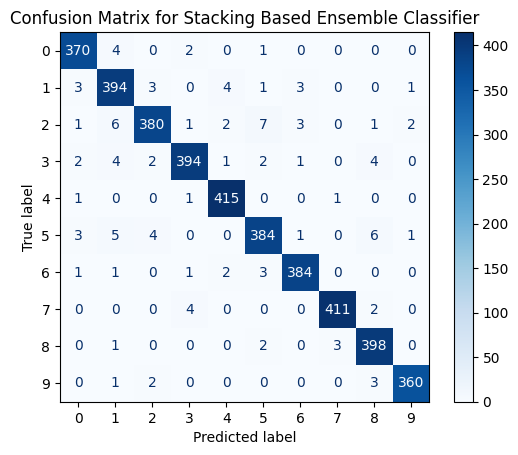

In [ ]:
# Create feature vectors for stacking based on predictions from base models

# `stacking_xtest`: A list of feature vectors where each feature vector consists of predictions from base models for each test sample.
stacking_xtest=[[y_pred_svm[i],y_pred_knn[i],y_pred_ann[i],y_pred_rft[i],y_pred_dt[i]] for i in range(len(X_test))]

# `stacking_xtrain`: A list of feature vectors where each feature vector consists of predictions from base models for each training sample.
stacking_xtrain=[[y_train_score_svm[i],y_train_score_knn[i],y_train_score_ann[i],y_train_score_rft[i],y_train_score_dt[i]] for i in range(len(X_train))]

# Initialize the MLPClassifier as the meta-model for stacking
ann_stacking = MLPClassifier(max_iter=1200)

# Train the stacking model using the predictions of the base models as features
# Fit the MLPClassifier on the training data where the features are the predictions from base models.
ann_stacking.fit(stacking_xtrain, y_train.ravel())

# Predict labels for the test data using the stacking model
# Use the trained stacking model to predict labels for the test set where the features are the predictions from base models.
y_pred_stacking=ann_stacking.predict(stacking_xtest)

# Predict labels for the training data using the stacking model
# Predict labels for the training set using the stacking model.
y_train_score_stacking=ann_stacking.predict(stacking_xtrain)

print("Accuracy of stacking based ensemble classifier is:\nTest ", accuracy_score(y_further, y_pred_stacking, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_stacking, normalize=True, sample_weight=None))

# Calculate additional metrics for the test set
print("Precision (Test):", precision_score(y_further, y_pred_stacking, average='weighted'))
print("Recall (Test):", recall_score(y_further, y_pred_stacking, average='weighted'))
print("F1 Score (Test):", f1_score(y_further, y_pred_stacking, average='weighted'))


# Calculate and print confusion matrix for the test data
cm = confusion_matrix(y_further, y_pred_stacking)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Stacking Based Ensemble Classifier")
plt.show()
